<a href="https://colab.research.google.com/github/SighOfFrostmourne/ECOM6022/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecom 6022 Assignment 1



##Setup the environment

In [ ]:
# Python ≥3.5 and Scikit-Learn ≥0.20 are required
import sys
import sklearn
import numpy as np
import os

# To plot pretty figures (for report etc)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
ROOT_PATH = "/content/drive/MyDrive/ECOM6022/Assignment_1"
os.chdir(ROOT_PATH)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Assignment_1"
HEIGHT_PATH = os.path.join(ROOT_PATH, "datasets/height")
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##Read the downloaed file from Google Drive

As moodle requires authorization to download the file, download link url doesn't work properly from the original coding introduced in Lecture. Thus download it and use directly.

In [ ]:
import pandas as pd

def load_height_data(height_path=HEIGHT_PATH):
    csv_path = os.path.join(height_path, "Hong Kong Father-Son Height Dataset.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [ ]:
height = load_height_data()
height.head()

,Father,Son
0,167.1,153.7
1,162.7,162.5
2,167.1,162.7
3,169.1,161.4
4,157.1,165.3


In [ ]:
height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


In [ ]:
height.describe()


,Father,Son
count,1078.000000,1078.000000
mean,173.988590,176.547310
std,7.053082,7.236714
min,151.700000,150.400000
25%,169.100000,172.000000
50%,174.300000,176.300000
75%,178.900000,181.200000
max,193.800000,201.500000


## Visualizing Geographical Data


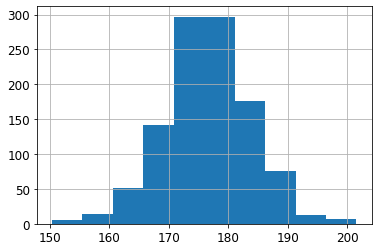

In [ ]:
height["Son"].hist()

## Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(height, test_size=0.2, random_state=42)

In [ ]:
train_set.head()

,Father,Son
875,165.5,167.6
949,172.0,174.0
618,185.1,184.6
881,173.3,166.6
590,169.1,182.5


##Looking for Correlations

Saving figure scatter_matrix_plot


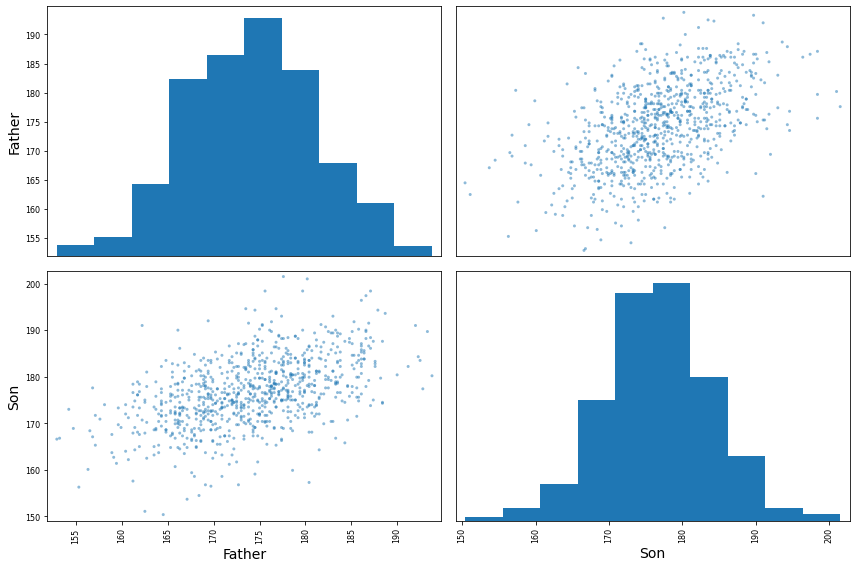

In [ ]:
height_train = train_set.copy()

corr_matrix = height_train.corr()
corr_matrix["Father"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes = ["Father", "Son"]
scatter_matrix(height_train[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")



Saving figure Father_vs_Son_value_scatterplot


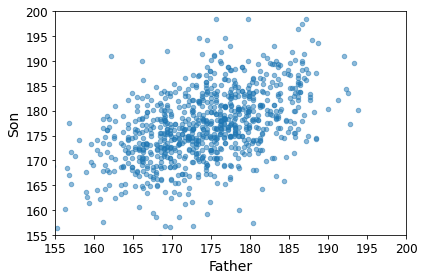

In [ ]:

height_train.plot(kind="scatter", x="Father", y="Son",
             alpha=0.5)
plt.axis([155, 200, 155, 200])
save_fig("Father_vs_Son_value_scatterplot")

# Prepare the Data for Machine Learning Algorithms

In [ ]:
# Take father's height as trainning data and Son's height as label
x_train = height_train["Father"].copy()
y_train = height_train["Son"].copy()
height_train_label = np.asarray(y_train).reshape(-1,1)

## Transformation Pipelines

Data Cleaning + Standardization

There is actually no need to do data cleaning this time as seen from info there's no missing data from the original file. But there's no harm defining here for re-use as it runs only for misssing ones.

In [ ]:
from ctypes import Array
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

height_train_tr = num_pipeline.fit_transform(np.asarray(x_train).reshape(-1,1))

## Select and Train a Model

There is no non-num attributes, thus height_train_tr is ready for traning!

### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print() #print an empty line

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, height_train_tr, height_train_label,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Linear: ")
display_scores(rmse_scores)

tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, height_train_tr, height_train_label,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("DecisionTree: ")
display_scores(rmse_scores)


forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(tree_reg, height_train_tr, height_train_label,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Forest: ")
display_scores(rmse_scores)

Linear: 
Scores: [6.91222559 6.48174829 6.98148573 6.16239253 5.78564577 5.50379105
 5.7661545  7.10237339 6.59054385 6.50045958]
Mean: 6.378682027603154
Standard deviation: 0.5273713516246745

DecisionTree: 
Scores: [7.0709937  7.57948395 7.76046123 6.47998028 6.54997063 5.64733032
 6.99877808 7.78687175 6.99265907 6.69451967]
Mean: 6.956104867186946
Standard deviation: 0.6257058553645749

Forest: 
Scores: [7.0709937  7.57948395 7.76046123 6.47998028 6.54997063 5.64733032
 6.99877808 7.78687175 6.99265907 6.69451967]
Mean: 6.956104867186946
Standard deviation: 0.6257058553645749



## Fine-Tune Your Model

###Grid Search

Use randomized search directly

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(height_train_tr, height_train_label.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f19a8cacf90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.966502199130777 {'n_estimators': 103}
6.962142078218651 {'n_estimators': 180}
6.962808544437034 {'n_estimators': 93}
6.981982746496787 {'n_estimators': 15}
6.963399755048365 {'n_estimators': 107}
6.952233488653537 {'n_estimators': 72}
6.95952952339911 {'n_estimators': 189}
6.959469376090941 {'n_estimators': 21}
6.966502199130777 {'n_estimators': 103}
6.959673664995523 {'n_estimators': 122}


###Analyze the Best Models and Their Errors

There's only one feature here thus we only need to analyzie the error, which has been done in previous steps

### Evaluate Your System on the Test Set

In [ ]:
# we now have the best model and the best hyperparameters according to cross-validation
# the remaining job is to try with the test data (that the model has never seen)
from sklearn.metrics import mean_squared_error
final_model = rnd_search.best_estimator_

# use stratified test data, remove the target column and copy this in a label array
X_test = test_set["Father"].copy()
y_test = test_set["Son"].copy()

# use the tranform pipeline to transform the test dataset
# the model is already trained earlier, and all coeficients have been "learned"
# now predict!!!
X_test_prepared = num_pipeline.transform(np.asarray(X_test).reshape(-1,1))
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

6.26473221900825

Compute a 95% confidence interval for the test RMSE:

In [ ]:
# Finally, computer the 95% condience level
# with 95% chance that the RMSE of the predicted house value is withih [45893, 49774]
# this can be compared with past experience from experts (without ML), and inform investment by the Company
# job well done!!!!
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5.55406034, 6.90261931])